In [1]:
import os
import pandas as pd

data = pd.read_csv(r"C:\Users\MIS\Downloads\DSA Project - Faiza, Aniqa and Zoraiz\dataset.csv")

In [2]:
data.head()

,0.000000000000000000e+00,9.176470588235293713e-01,9.176470588235293713e-01.1,9.215686274509803377e-01,9.254901960784314152e-01,9.254901960784314152e-01.1,9.294117647058823817e-01,9.333333333333333481e-01,9.333333333333333481e-01.1,9.490196078431372140e-01,...,9.882352941176471006e-01.142,9.882352941176471006e-01.143,9.882352941176471006e-01.144,9.882352941176471006e-01.145,9.882352941176471006e-01.146,9.882352941176471006e-01.147,9.882352941176471006e-01.148,9.882352941176471006e-01.149,9.882352941176471006e-01.150,9.882352941176471006e-01.151
0,0.0,0.062745,0.062745,0.066667,0.070588,0.070588,0.074510,0.078431,0.078431,0.113725,...,0.094118,0.152941,0.172549,0.149020,0.145098,0.172549,0.211765,0.203922,0.207843,0.219608
1,1.0,0.435294,0.525490,0.549020,0.490196,0.478431,0.560784,0.619608,0.611765,0.568627,...,0.858824,0.850980,0.866667,0.854902,0.835294,0.811765,0.792157,0.776471,0.772549,0.768627
2,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.286275,0.282353,0.282353,0.278431,0.278431,0.278431,0.282353,0.282353,0.286275,0.290196
3,1.0,0.725490,0.709804,0.682353,0.666667,0.670588,0.694118,0.725490,0.745098,0.745098,...,0.513725,0.478431,0.513725,0.584314,0.568627,0.490196,0.466667,0.486275,0.505882,0.505882
4,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import zipfile
from matplotlib import pyplot as plt
from PIL import Image
import IPython.display as display
from IPython.display import clear_output
from ipywidgets import HBox, Button, interact, fixed


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_train = data[:400].T
y_train = data_train[0]
x_train = data_train[1:n]

data_dev = data[400:m].T
y_dev = data_dev[0]
x_dev = data_dev[1:n]

In [5]:
x_train.shape

(784, 400)

In [8]:
def Initialize(shape):
    '''This function initializes the Tensor, returning an nd array of the given shape(dimensions)'''
    num_class, num_pixels = shape
    return np.random.normal(size=(num_class, num_pixels))

def dot(a, b):
    '''This function returns the dot product of two tensors'''
    # Check if the dimensions are compatible for dot product
    if isinstance(a, (int, float)):
        a = np.array([[a]])
    else:
        a = np.array(a)

    if isinstance(b, (int, float)):
        b = np.array([[b]])
    else:
        b = np.array(b)

    if len(a.shape) > 2 or len(b.shape) > 2:
        raise ValueError("Input arrays must be 1D or 2D")
    if a.shape[-1] != b.shape[0]:
        raise ValueError("shapes {} and {} not aligned: {} (dim 0) != {} (dim 0)".format(a.shape, b.shape, a.shape[1], b.shape[0]))

    # If either array is 1D, convert it to a row or column vector
    if len(a.shape) == 1:
        a = a.reshape(1, -1)
    if len(b.shape) == 1:
        b = b.reshape(-1, 1)

    # Perform dot product
    result = np.zeros((a.shape[0], b.shape[1]))
    for i in range(a.shape[0]):
        for j in range(b.shape[1]):
            result[i, j] = np.sum(a[i] * b[:, j])
    if result.shape == (1, 1):
        return result[0, 0]
    return result

def Conv(kernel, image_tensor, bias):
    '''This is the convolution function, which slides a kernel(filter) over an image tensor and adds a bias tensor to it'''
    return dot(kernel, image_tensor) + bias #kernel.dot(image_tensor) + bias # + bias

def BatchNorm(image_tensor):
    '''This is the batch normalization function. It normalizes the input tensor by subtracting the mean and dividing by the standard deviation.'''
    mean = np.mean(image_tensor, axis=1, keepdims=True)
    std = np.std(image_tensor, axis=1, keepdims=True)
    return (image_tensor - mean) / (std + 1e-8)

def ReLU(image_tensor):
    '''This is the activation function. It returns the same element value in the tensor when greater than zero,
    and performs 0.1 multiplication if less than 0'''
#     return np.maximum(0, image_tensor)
    return np.where (image_tensor < 0, 0.1 * image_tensor, image_tensor)

def softmax(image_tensor):
    '''This is the softmax activation function. It operates on the exponential formula against the subtracted max value of the tensor'''
    exp = np.exp(image_tensor - np.max(image_tensor,axis=1,keepdims=True))
    probs = exp / np.sum(exp,axis=1,keepdims=True)
    return probs


def one_hot(Y):
    '''This fucntion uses a label tensor, and creates the vector representation of each of its variables'''
    Y = Y.astype(int) # if float
    one_hot_y = np.zeros((Y.size, Y.max() + 1)) # create a 0 vector
    one_hot_y[np.arange(Y.size), Y] = 1 # add Y in the appropriate place
    one_hot_y = one_hot_y.T # transpose the vector tensor
    return one_hot_y


def wnb_tensors(size, deriv_z, a_tensor):
    '''This function returns the derivatives of the weight and bias against the output, so that the new weights and
    biases can be adjusted accordingly'''
    deriv_weight = 1/size * deriv_z.dot(a_tensor.T) #
    deriv_bias = 1/size * np.sum(deriv_z, 1)
    return deriv_weight, deriv_bias

def get_predictions(resultant_tensor):
    '''This function returns an array of indices where each index corresponds to the class with the highest
    probability for each sample'''
    predictions =  np.argmax(resultant_tensor, 0)
    if len(predictions) <30:
      print(predictions)
    return predictions

def get_accuracy(predictions, label_tensor):
    '''This function returns the accuracy value of the model by comparision of prediction and label tensors'''
#     print(predictions, label_tensor)
    return np.sum(predictions==label_tensor) / label_tensor.size

In [9]:
def init_params():
    # setting the initial weights and bias at random values
    W1 = Initialize((2, 784)) # weight height = output height, weight width = input width
    b1 = np.zeros((2 , 1)) # bias height = output height, bias weight = 1

    W2 = Initialize((2, 2))
    b2 = np.zeros((2 , 1))

    
    return W1, b1, W2, b2


def forward_prop(W1, b1, W2, b2, X):
    # uses weights and biases to make patterns, implement layer functions
    Z1 = Conv(W1, X, b1) #convolution
    A1 = ReLU(Z1) #activation
    A1_norm = BatchNorm(A1) # batch normalization
    Z2 = Conv(W2, A1_norm, b2) # second convolution
    A2 = softmax(Z2) # activation
    return Z1, A1, A1_norm, Z2, A2
    


def deriv_ReLU(param):
    return np.where(param < 0, 0.1, 1)


def back_prop(Z1, A1, A1_norm, Z2, A2, W2, X, Y):
    m = Y.size
    one_hot_y = one_hot(Y) #creating vectors
    dZ2 = A2 - one_hot_y #derivivative of the output error
    dW2, db2 = wnb_tensors(m, dZ2, A1_norm) # finding the deriv of output wrt second convolution
    dA1_norm = dot(W2.T, dZ2) #W2.T.dot(dZ2) # finding the deriv of output wrt first activation
    dA1 = dA1_norm * deriv_ReLU(A1) # finding the deriv of output wrt first activation with Leaky ReLU
    #dX = dA1.dot(W1.T) # finding the deriv of output wrt input image #comment if not work
    dX = X
    dW1 = 1/m * dA1.dot(X.T) # finding the deriv of output wrt first convolution
    db1 = 1/m * np.sum(dA1, 1)
    return dW1, db1, dW2, db2, dX






def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    db1 = db1.reshape((2,1))
    db2 = db2.reshape((2,1))
    # updating the weight and bias
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2





def gradient_descent(X, Y, iterations, alpha):
    epochs = []
    accuracy = []
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, A1_norm, Z2, A2 = forward_prop(W1, b1, W2, b2, X) # process
        dW1, db1, dW2, db2, dX = back_prop(Z1, A1, A1_norm, Z2, A2, W2, X, Y) # learn
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha) # update weights and biases
#         if i % 10 == 0:
            #print('Iteration:', i)
        epochs.append(i)
        acc = get_accuracy(get_predictions(A2), Y) # find rate of accuracy
        accuracy.append(acc)
            #print('Accuracy', acc)
    plt.plot(epochs,accuracy) # plot inc in accuracy
    plt.show() # show acc graph
    return W1, b1, W2, b2




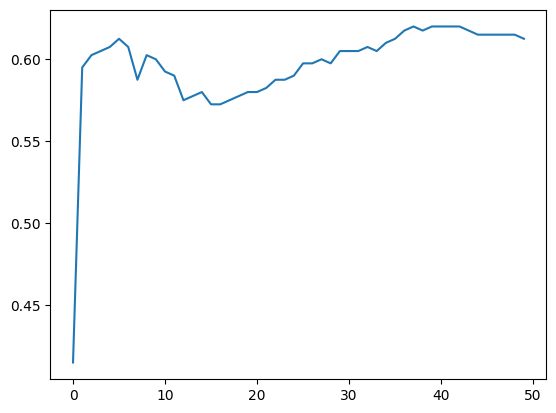

In [10]:
W1, b1, W2, b2 = gradient_descent(x_train, y_train, 50, 4e-1)

In [14]:
def make_prediction(X, W1, b1, W2, b2):
    _, _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions
print(W1, b1, W2, b2)
def test_predictions(index,l_train, W1, b1, W2, b2):
    current_image = l_train[:, index, None]
    prediction = make_prediction(l_train[:, index, None], W1, b1, W2, b2)
    label = y_train[index]
    return prediction, label


[[ 2.08090895  2.02753552 -0.65904984 ...  3.59297376  1.28750651
   1.96942254]
 [-2.2397247  -3.37129464 -1.60155403 ... -1.58875659 -0.66530753
  -1.47070574]] [[ 2.04981548]
 [-2.22806014]] [[ 1.40814459 -3.08655526]
 [-1.23071433  1.31947553]] [[10.55]
 [ 9.35]]


In [15]:
data_test = pd.read_csv(r"C:\Users\MIS\OneDrive\Desktop\cnn\dataset_dem2.csv")

In [16]:
data_t = np.array(data_test)
data_t.shape

(20, 784)

In [17]:
data_r = data_t.T
prediction_test = make_prediction(data_r, W1, b1, W2, b2)


[0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0]


In [20]:
import PySimpleGUI as sg

def main(prediction_test):
    # Sample information list corresponding to images
    information = []
    for el in prediction_test:
        if el == 0:
            information.append('The chosen image appears to be a gun.')
        else:
            information.append('The chosen image appears to be a knife.')

    image_paths = [
        r"D:\dsa cnn\test_class_png\01.png",
        r"D:\dsa cnn\test_class_png\02.png",
        r"D:\dsa cnn\test_class_png\03.png",
        r"D:\dsa cnn\test_class_png\04.png",
        r"D:\dsa cnn\test_class_png\05.png",
        r"D:\dsa cnn\test_class_png\06.png",
        r"D:\dsa cnn\test_class_png\07.png",
        r"D:\dsa cnn\test_class_png\08.png",
        r"D:\dsa cnn\test_class_png\09.png",
        r"D:\dsa cnn\test_class_png\10.png",
        r"D:\dsa cnn\test_class_png\11.png",
        r"D:\dsa cnn\test_class_png\12.png",
        r"D:\dsa cnn\test_class_png\13.png",
        r"D:\dsa cnn\test_class_png\14.png",
        r"D:\dsa cnn\test_class_png\15.png",
        r"D:\dsa cnn\test_class_png\16.png",
        r"D:\dsa cnn\test_class_png\17.png",
        r"D:\dsa cnn\test_class_png\18.png",
        r"D:\dsa cnn\test_class_png\19.png",
        r"D:\dsa cnn\test_class_png\20.png"
    ]

    # Create layout for each image with a button
    images_layout = [
        [sg.Image(filename=image_path, key=f'-IMAGE-{i}', size=(200, 200), background_color='lightblue'),
         sg.Button('Click to choose', key=f'-INFO-{i}', button_color=('white', 'black'))] for i, image_path in enumerate(image_paths)
    ]

    layout = [
        [sg.Text('Welcome to Image Classification with CNNs. Simply click an image to get its prediction results as our model predicts them!', 
                 justification='center', size=(50, 2), font=('Helvetica', 14))],
        [sg.Text('(Note that with 60% accuracy, predictions may vary.)', 
                 justification='left', size=(50, 2), font=('Helvetica', 9))],
        [sg.Column(images_layout, scrollable=True, size=(500, 500), vertical_scroll_only=True)],
        [sg.Button('Close')]
    ]

    window = sg.Window('Image Viewer', layout)

    while True:
        event, values = window.read()
        if event == sg.WINDOW_CLOSED or event == 'Close':
            break
        # Check if an info button is clicked
        for i in range(len(image_paths)):
            if event == f'-INFO-{i}':
                display_info(information[i])

    window.close()

def display_info(info):
    # Create layout for displaying information
    layout = [
        [sg.Text(info)],
        [sg.Button('Close')]
    ]

    window = sg.Window('Information', layout, modal=True)

    while True:
        event, _ = window.read()
        if event == sg.WINDOW_CLOSED or event == 'Close':
            break

    window.close()

if __name__ == '__main__':
    main(prediction_test)
